In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import time

In [6]:
r = pd.read_csv('winequality-red.csv', sep = ';')
w = pd.read_csv('winequality-white.csv', sep = ';')

In [7]:
r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
set(r.quality), set(w.quality)

({3, 4, 5, 6, 7, 8}, {3, 4, 5, 6, 7, 8, 9})

In [12]:
rw = r.copy()
rw['type'] = 1
ww = w.copy()
ww['type'] = 0
wines = rw.append(ww)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [13]:
r.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


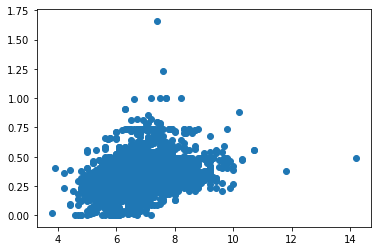

In [21]:
plt.scatter(w['fixed acidity'], w['citric acid'])

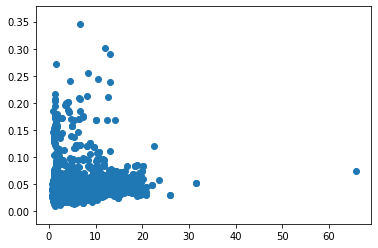

In [32]:
plt.scatter(w['residual sugar'], w['chlorides'])

In [87]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (1, 12)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(256, activation = 'sigmoid'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(7, activation = 'softmax')
])

In [88]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',  #[0,1,2] = labels
              metrics = ['accuracy'])

In [89]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [90]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']
category = ['quality']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(wines[features],
                                                    wines[category],
                                                    test_size=0.25, random_state = 1) # 70% training and 30% test

In [92]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
275,7.9,0.545,0.06,4.00,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,1
1807,8.8,0.200,0.43,15.00,0.053,60.0,184.0,1.00080,3.28,0.79,8.8,0
1564,9.1,0.280,0.49,2.00,0.059,10.0,112.0,0.99580,3.15,0.46,10.1,0
3024,7.0,0.130,0.37,12.85,0.042,36.0,105.0,0.99581,3.05,0.55,10.7,0
928,6.5,0.250,0.35,12.00,0.055,47.0,179.0,0.99800,3.58,0.47,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
905,9.2,0.580,0.20,3.00,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,1
3593,5.6,0.280,0.28,4.20,0.044,52.0,158.0,0.99200,3.35,0.44,10.7,0
2381,7.0,0.230,0.42,5.10,0.042,37.0,144.0,0.99518,3.50,0.59,10.2,0
235,7.2,0.630,0.00,1.90,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,1


In [93]:
y_train

,quality
275,6
1807,6
1564,5
3024,6
928,5
...,...
905,5
3593,7
2381,6
235,6


In [98]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(set(y_train['quality'])))

LabelEncoder()

In [103]:
y = le.transform(y_train['quality'])
y

array([3, 3, 2, ..., 3, 3, 3])

In [104]:
catega = list(set(y_train['quality']))
catega

[3, 4, 5, 6, 7, 8, 9]

In [105]:
categaf = le.transform(catega)
categaf

array([0, 1, 2, 3, 4, 5, 6])

In [106]:
ycheck = le.inverse_transform(categaf)
ycheck

array([3, 4, 5, 6, 7, 8, 9])

In [107]:
lista = []
X = X_train.reset_index(drop = True)
lenx = len(X)
for i in range(len(X)):
    lista.append(np.array(X[i:i+1].values))
    time.sleep(0.0001)
    print('Faltam '+str(lenx-i)+' execuções', end='  \r')
lista = np.array(lista)
lista.shape

(4872, 1, 12)

In [108]:
lista

array([[[ 7.9  ,  0.545,  0.06 , ...,  0.67 , 10.7  ,  1.   ]],

       [[ 8.8  ,  0.2  ,  0.43 , ...,  0.79 ,  8.8  ,  0.   ]],

       [[ 9.1  ,  0.28 ,  0.49 , ...,  0.46 , 10.1  ,  0.   ]],

       ...,

       [[ 7.   ,  0.23 ,  0.42 , ...,  0.59 , 10.2  ,  0.   ]],

       [[ 7.2  ,  0.63 ,  0.   , ...,  0.58 ,  9.   ,  1.   ]],

       [[ 5.7  ,  0.22 ,  0.22 , ...,  0.48 ,  9.   ,  0.   ]]])

In [110]:
model.fit(lista, y, epochs = 20, batch_size = 16)

Epoch 1/20
4872/4872 [==============================] - 2s 422us/sample - loss: 1.0710 - acc: 0.5281
Epoch 2/20
4872/4872 [==============================] - 2s 431us/sample - loss: 1.0716 - acc: 0.5246
Epoch 3/20
4872/4872 [==============================] - 2s 404us/sample - loss: 1.0635 - acc: 0.5255
Epoch 4/20
4872/4872 [==============================] - 2s 393us/sample - loss: 1.0764 - acc: 0.5242
Epoch 5/20
4872/4872 [==============================] - 2s 402us/sample - loss: 1.0686 - acc: 0.5287
Epoch 6/20
4872/4872 [==============================] - 2s 356us/sample - loss: 1.0634 - acc: 0.5283
Epoch 7/20
4872/4872 [==============================] - 2s 415us/sample - loss: 1.0697 - acc: 0.5279
Epoch 8/20
4872/4872 [==============================] - 2s 408us/sample - loss: 1.0550 - acc: 0.5312
Epoch 9/20
4872/4872 [==============================] - 2s 435us/sample - loss: 1.0610 - acc: 0.5291
Epoch 10/20
4872/4872 [==============================] - 2s 398us/sample - loss: 1.0658 - a

In [111]:
listap = []
Xp = X_test.reset_index(drop = True)
lenxp = len(Xp)
for i in range(len(Xp)):
    listap.append(np.array(Xp[i:i+1].values))
listap = np.array(listap)
listap.shape

(1625, 1, 12)

In [117]:
yp = np.argmax(model.predict(listap), axis = 1)

In [118]:
yp

array([2, 3, 3, ..., 3, 2, 3])

In [120]:
yr = np.array(y_test['quality'])
yr = le.transform(yr)

In [121]:
yr == yp

array([ True, False,  True, ...,  True,  True, False])

In [122]:
sum(yr == yp)/len(yp)

0.5366153846153846

In [123]:
result = pd.DataFrame()
result['real'] = (yr)
result['pred'] = (yp)

In [124]:
result.head(20)

,real,pred
0,2,2
1,2,3
2,3,3
3,2,3
4,3,2
5,4,3
6,3,2
7,3,3
8,3,3
9,2,3


In [125]:
cat = list(set(result['real']))
matrix = pd.DataFrame()
for crow in cat:
    print(crow)
    lista = []
    for ccol in cat:
        a = len(result[result['real'] == crow])
        b = len(result[(result['real'] == crow) & (result['pred'] == ccol)])
        lista.append(b/a)
    matrix[crow] = lista

0
1
2
3
4
5
6


In [126]:
matrix = matrix.set_index(matrix.columns)

Text(123.0, 0.5, 'real')

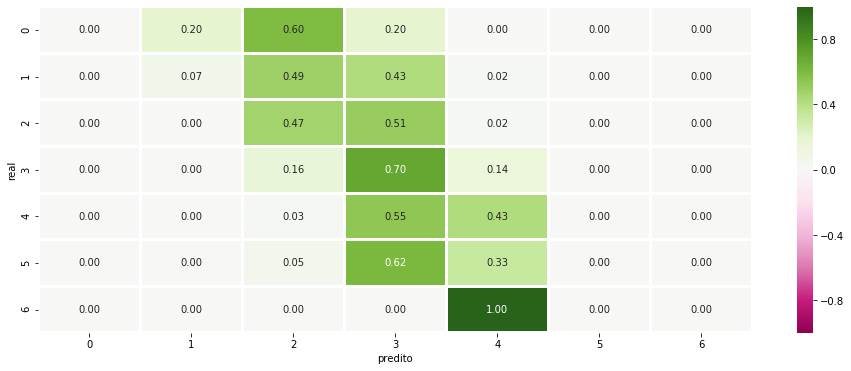

In [127]:
import seaborn as sns;
plt.figure(figsize=(16, 6))
sns.heatmap(matrix.T,fmt='.2f',cmap='PiYG',vmin=-1,vmax=1, annot=True, linewidths=2)
plt.xlabel('predito')
plt.ylabel('real')